

In machine learning, we usually work with data in a neat format: rows and columns of numbers (like a table where each row is one example and each column is a feature). But in the real world, data isn’t always in this clean, numeric form.

**Feature engineering** is the process of **taking messy, raw data and turning it into numbers** that a machine learning model can understand and work with.

This process includes:

* Turning **categories** (like "red", "blue", "green") into numbers.
* Turning **text** (like sentences or reviews) into numbers.
* Turning **images** (like photos) into numbers.
* Creating new **features** from existing ones to help the model perform better.
* **Filling in missing data** so the model doesn’t get confused.

This whole transformation—changing different types of data into numeric vectors—is often called **vectorization**.






### 🧵 Example: Online Store – Customer Orders

Suppose you are analyzing orders from an online store. Here’s a small dataset:

```python
orders = [
    {'product': 'Laptop', 'payment_method': 'Credit Card', 'amount': 1200},
    {'product': 'Phone', 'payment_method': 'PayPal', 'amount': 800},
    {'product': 'Tablet', 'payment_method': 'Credit Card', 'amount': 600},
    {'product': 'Phone', 'payment_method': 'Cash', 'amount': 750}
]
```

This data has:

* **Numerical data**: `amount`
* **Categorical data**: `product` and `payment_method`

### ❌ Why we *shouldn't* do this:

You might think of converting the categories into numbers like this:

```python
{'Laptop': 1, 'Phone': 2, 'Tablet': 3}
```

This makes the model think "Phone is 2 times better than Laptop", which is **nonsense** for product names.

---

### ✅ The correct way: One-hot encode the categorical data

Using **`DictVectorizer`** in Scikit-learn:

```python
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)

X = vec.fit_transform(orders)
print(X)
```

**Resulting Matrix:**

```
[[  0.  1.  0.  1.  0. 1200.]
 [  1.  0.  0.  0.  1.  800.]
 [  0.  1.  0.  1.  0.  600.]
 [  0.  0.  1.  0.  1.  750.]]
```

Each column represents a **feature**:

```python
vec.get_feature_names_out()
```

Gives:

```
['payment_method=Cash',
 'payment_method=Credit Card',
 'payment_method=PayPal',
 'product=Laptop',
 'product=Phone',
 'amount']
```

---

### ✅ Explanation:

For the first row:

```python
{'product': 'Laptop', 'payment_method': 'Credit Card', 'amount': 1200}
```

It becomes:

```
[0, 1, 0, 1, 0, 1200]
```

* `payment_method=Credit Card` → 1
* `product=Laptop` → 1
* Everything else is 0
* `amount` stays as-is

---

### 🔍 Why this helps the model:

* The model doesn't treat "Phone" as higher or lower than "Laptop".
* Each category becomes its **own independent binary flag**.
* The model can learn patterns like:

  * “Orders paid by PayPal tend to have lower amounts”
  * “Phones are often bought with cash”

---

### 🧠 Recap:

| Step           | What it does                                          |
| -------------- | ----------------------------------------------------- |
| Identify       | Find non-numeric (categorical) columns                |
| One-hot encode | Turn each category into a separate column with 1 or 0 |
| Fit model      | Now your model works with clean, numeric data         |

---



| Cash | CreditCard | PayPal | Laptop | Phone | Amount |
| ---- | ---------- | ------ | ------ | ----- | ------ |
| 0    | 1          | 0      | 1      | 0     | 1200   |
| 0    | 0          | 1      | 0      | 1     | 800    |
| 0    | 1          | 0      | 1      | 0     | 600    |
| 1    | 0          | 0      | 0      | 1     | 750    |


payment method is Credit Card → only column 1 gets 1

product is Laptop → only column 3 gets 1

amount is just 1200




## 🧠 Goal:

We want to **convert text into numbers**, so we can use it in machine learning models.

This process is called **text vectorization**.

---

## 📝 Example:

Imagine we have 3 short phrases:

```python
sample = [
    'problem of evil',
    'evil queen',
    'horizon problem'
]
```

These are just **text strings**, but machine learning models **don’t understand text** — they understand **numbers**.

So we need to turn these texts into a form like:

```
[0, 1, 1, 0, 0]  ← represents how many times each word appeared
```

---

## 🔢 Method 1: **Word Count (Bag of Words)**

This is the simplest method.

### 🔧 Using `CountVectorizer`:

```python
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
```

It:

* Splits each sentence into words
* Counts how many times each word appears

### 🗂 All words found:

There are **5 unique words** across all phrases:

```
['evil', 'horizon', 'of', 'problem', 'queen']
```

### 📊 Data as a table:

| Phrase            | evil | horizon | of | problem | queen |
| ----------------- | ---- | ------- | -- | ------- | ----- |
| 'problem of evil' | 1    | 0       | 1  | 1       | 0     |
| 'evil queen'      | 1    | 0       | 0  | 0       | 1     |
| 'horizon problem' | 0    | 1       | 0  | 1       | 0     |

Each row shows the **word count** for each word in that sentence.

This is called a **sparse matrix** because most values are 0 (i.e., most words don’t appear in each sentence).

---

## ⚠️ Problem:

If a word appears very often (like “the”, “is”, etc.), it might dominate and confuse the model.

So we use a smarter version called:

---

## 🧠 Method 2: **TF-IDF (Term Frequency - Inverse Document Frequency)**

This gives:

* **High score** if a word appears often **in one sentence**
* **Low score** if that word appears **in many sentences**

It helps models focus on **important words** instead of common ones.

### 🔧 Using `TfidfVectorizer`:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
```

### 📊 New table:

| Phrase            | evil | horizon | of   | problem | queen |
| ----------------- | ---- | ------- | ---- | ------- | ----- |
| 'problem of evil' | 0.52 | 0       | 0.68 | 0.52    | 0     |
| 'evil queen'      | 0.61 | 0       | 0    | 0       | 0.80  |
| 'horizon problem' | 0    | 0.80    | 0    | 0.61    | 0     |

Now the numbers are **not just counts**, but **weighted scores** that show how unique and important the words are in each phrase.

---

## 💡 Summary:

| Method          | What it does                                             |
| --------------- | -------------------------------------------------------- |
| CountVectorizer | Turns each sentence into a count of each word            |
| TfidfVectorizer | Turns each sentence into a score showing word importance |

---

### 📌 Real-life uses:

* Analyzing social media posts
* Spam detection
* Sentiment analysis
* Search engines



## What’s the main idea?
We often start with simple models (like straight lines).
But real-world data is rarely that simple. It may follow curves or complex shapes.

So instead of using a more complex model, we transform the input data to make it easier for simple models to fit better.

These transformations are called derived features.

We have data

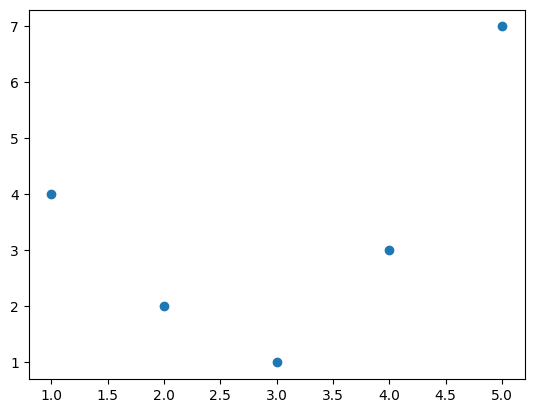

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x, y)  # show the points
plt.show()


The data does not follow a straight line.

## Try simple linear regression (a straight line)

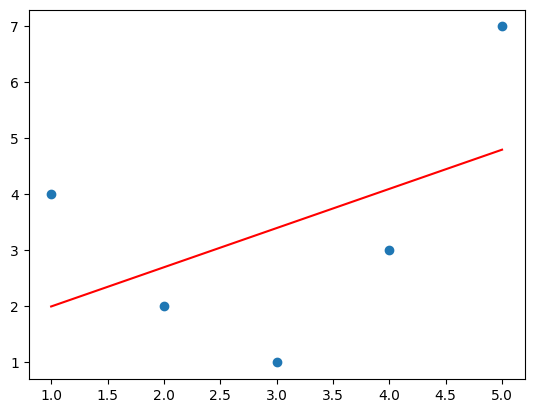

In [2]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]  # reshape from 1D to 2D, as model expects 2D input
model = LinearRegression().fit(X, y)  # fit the line
yfit = model.predict(X)  # get predicted values

plt.scatter(x, y)        # actual data
plt.plot(x, yfit, color='red')  # predicted line
plt.show()


The red line doesn’t fit the data well — the data bends, but the line is straight.

## Add polynomial features (e.g., x², x³)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Create a PolynomialFeatures object
# - degree=3 means we want to generate x, x^2, and x^3 (i.e., cubic transformation)
# - include_bias=False means we don't want to add a column of 1s (which acts like the intercept term).
#   The model will handle intercepts automatically.
poly = PolynomialFeatures(degree=3, include_bias=False)

# Step 2: Transform the original 1D feature (X) into higher degree features
# For each value of x, this will generate a new row containing:
# [x, x^2, x^3]
# For example, if x = 2, the transformed row becomes [2, 4, 8]
X2 = poly.fit_transform(X)

# Step 3: Print the transformed feature matrix
# The output will show a matrix where:
# - Column 1 = original x
# - Column 2 = x squared
# - Column 3 = x cubed
print(X2)


[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


Each row now has:

First column: x

Second column: x²

Third column: x³

So for x = 2, we get [2, 4, 8].

## Fit the same Linear Regression model on this transformed data

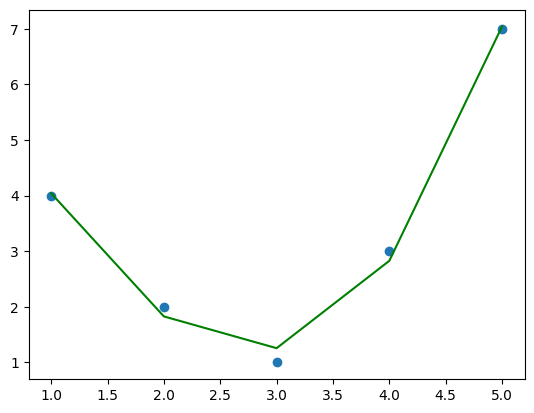

In [5]:
model = LinearRegression().fit(X2, y)  # train using polynomial features
yfit = model.predict(X2)               # get predicted values

plt.scatter(x, y)                      # plot original points
plt.plot(x, yfit, color='green')       # plot the curve
plt.show()


| Concept                | Meaning                                                            |
| ---------------------- | ------------------------------------------------------------------ |
| **Derived Features**   | New features made by transforming existing ones (like x², x³)      |
| **PolynomialFeatures** | Automatically creates x, x², x³, etc. for you                      |
| **Why it works?**      | It lets a simple model (like a straight-line model) fit curvy data |
